### Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [20]:
knn = pd.read_csv('counter_strike_2.csv')
#MEMBACA FILE DATASET

In [3]:
knn

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,de_train,False,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,T
1996,31.23,7.0,10.0,de_train,True,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,T
1997,11.23,7.0,10.0,de_train,True,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,T
1998,174.91,7.0,11.0,de_train,False,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,T


In [4]:
knn.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,95.630205,6.840000,6.28850,406.170500,402.987500,306.749000,309.54450,7867.350000,12377.600000,1.821500,3.009500
std,53.734491,4.233599,4.19059,137.616258,137.699186,172.857221,168.68957,9017.491838,12209.581798,1.774884,1.960952
min,0.050000,0.000000,0.00000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,54.910000,3.000000,3.00000,315.750000,328.750000,188.000000,190.00000,1200.000000,1700.000000,0.000000,1.000000
50%,94.910000,7.000000,6.00000,500.000000,500.000000,300.000000,362.00000,4000.000000,9075.000000,1.000000,4.000000
75%,156.425000,10.000000,10.00000,500.000000,500.000000,488.000000,467.00000,11762.500000,19250.000000,3.000000,5.000000
max,175.000000,15.000000,15.00000,500.000000,500.000000,500.000000,500.00000,58050.000000,67700.000000,5.000000,5.000000


In [5]:
knn.info()
#INFO DATA YANG ADA DAALMA DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time_left     2000 non-null   float64
 1   ct_score      2000 non-null   float64
 2   t_score       2000 non-null   float64
 3   map           2000 non-null   object 
 4   bomb_planted  2000 non-null   bool   
 5   ct_health     2000 non-null   float64
 6   t_health      2000 non-null   float64
 7   ct_armor      2000 non-null   float64
 8   t_armor       2000 non-null   float64
 9   ct_money      2000 non-null   float64
 10  t_money       2000 non-null   float64
 11  ct_helmets    2000 non-null   float64
 12  t_helmets     2000 non-null   float64
 13  round_winner  2000 non-null   object 
dtypes: bool(1), float64(11), object(2)
memory usage: 205.2+ KB


### Mengubah Values Kolom yang bertipe Data String/Objek menjadi Numerik

In [21]:
for col in ['map', 'bomb_planted', 'round_winner']:
    label_encoder = LabelEncoder()
    knn[col] = label_encoder.fit_transform(knn[col])
    #MEMBERIKAN LEBELKAN ENCODING

In [7]:
knn

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0
1,156.03,0.0,0.0,0,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,0
2,96.03,0.0,0.0,0,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,0
3,76.03,0.0,0.0,0,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,0
4,174.97,1.0,0.0,0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,5,0,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,1
1996,31.23,7.0,10.0,5,1,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,1
1997,11.23,7.0,10.0,5,1,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,1
1998,174.91,7.0,11.0,5,0,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,1


### Memisahkan kolom target dari data 

In [8]:
x = knn.drop('round_winner', axis = 1)
y = knn['round_winner']
#MEMISAHKAN FITUR DAN TARGET VARIABEL

In [9]:
x

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets
0,175.00,0.0,0.0,0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0
1,156.03,0.0,0.0,0,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0
2,96.03,0.0,0.0,0,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0
3,76.03,0.0,0.0,0,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0
4,174.97,1.0,0.0,0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,5,0,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0
1996,31.23,7.0,10.0,5,1,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0
1997,11.23,7.0,10.0,5,1,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0
1998,174.91,7.0,11.0,5,0,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0


In [10]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    0
Name: round_winner, Length: 2000, dtype: int32

### Splitting Data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#PEMBAGIAN DATA YANG DILATIH DAN DIUJI

### Mengetahui Dimensi dari data training 

In [12]:
x_train.shape

(1600, 13)

In [13]:
x_test.shape

(400, 13)

In [14]:
y_train.shape

(1600,)

In [15]:
y_test.shape

(400,)

### Modelling KNN

In [16]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(x_train, y_train)
#PEMBUATAN PELATIHAN MODEL KNN

KNeighborsClassifier()

In [17]:
hasil_prediksi_KNN = modelKNN.predict(x_test)
#MELAKUKAN PREDIKSI DAN PENGUKURAN AKURASI

In [18]:
print('Akurasi Model: ', accuracy_score(y_test, hasil_prediksi_KNN) * 100)

Akurasi Model:  74.75


<Figure size 1500x1000 with 0 Axes>

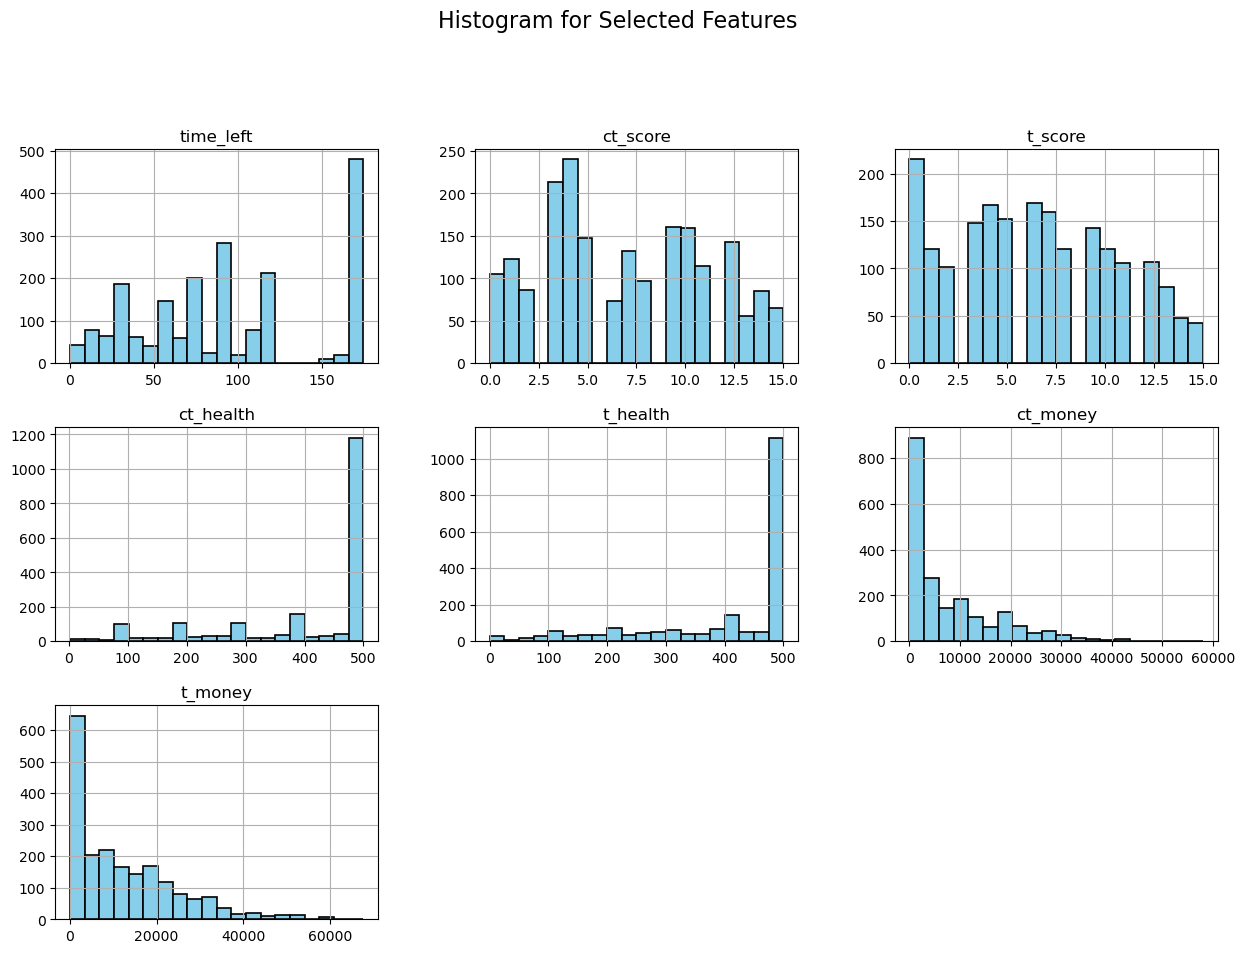

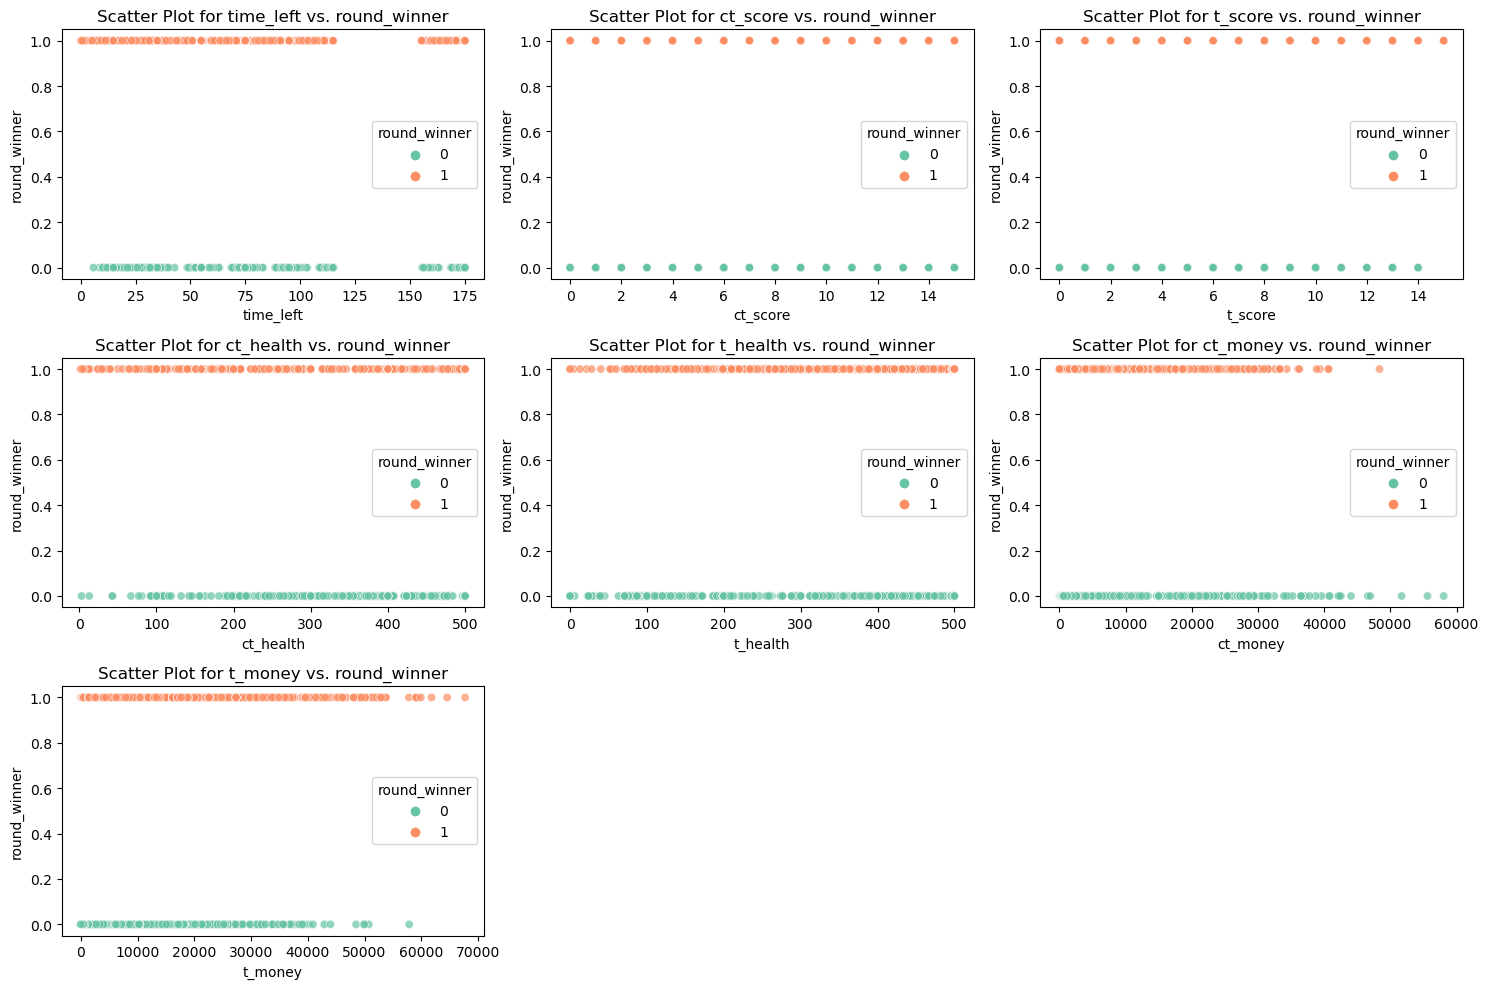

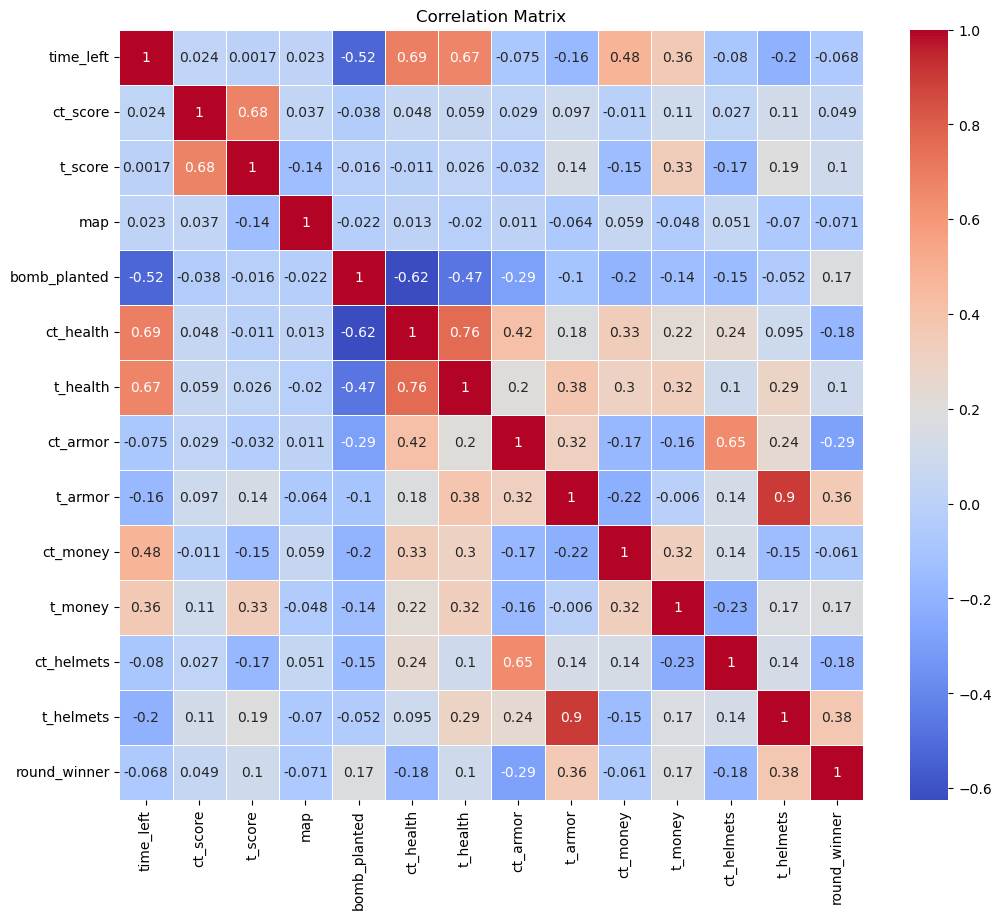

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Histogram untuk beberapa fitur
selected_features = ['time_left', 'ct_score', 't_score', 'ct_health', 't_health', 'ct_money', 't_money']

plt.figure(figsize=(15, 10))
knn[selected_features].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black', linewidth=1.2)
plt.suptitle('Histogram for Selected Features', y=1.02, fontsize=16)
plt.show()

# Visualisasi Sebaran Data untuk beberapa fitur terhadap round_winner
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=feature, y='round_winner', data=knn, hue='round_winner', palette='Set2', alpha=0.7)
    plt.title(f'Scatter Plot for {feature} vs. round_winner')

plt.tight_layout()
plt.show()

# Visualisasi Matriks Korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = knn.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
